<a href="https://colab.research.google.com/github/gabrielamorales02/IntroMachineLearning/blob/main/Caso_1_Heart_Disease_No_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv

--2025-04-21 20:22:35--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv [following]
--2025-04-21 20:22:35--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195955 (191K) [text/plain]
Saving to: ‘framingham.csv.2’

framingham.csv.2    100%[===================>] 191.36K  --.-KB/s    in 0.004s  

2025-04-21 20:22:35 (41.7 MB/s) - ‘framingham.csv.2’ 

## LOGISTIC REGRESSION - HEART DISEASE PREDICTION

###Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

###Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

###Demographic:
    • Sex: male or female(Nominal)
    • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    Behavioral
    • Current Smoker: whether or not the patient is a current smoker (Nominal)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
###Medical( history)
    • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    • Diabetes: whether or not the patient had diabetes (Nominal)
###Medical(current)
    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    • Glucose: glucose level (Continuous)
    Predict variable (desired target)
    • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


### Cargar Datos

In [5]:
import pandas as pd
data = pd.read_csv("framingham.csv")

In [6]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Descriptiva

#### Cuantos datos tiene la tabla

In [8]:
print(len(data))

4238


#### Medidas de tendencia central de las variables.

In [10]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### Grafico de Barras con el número de hombres y mujeres

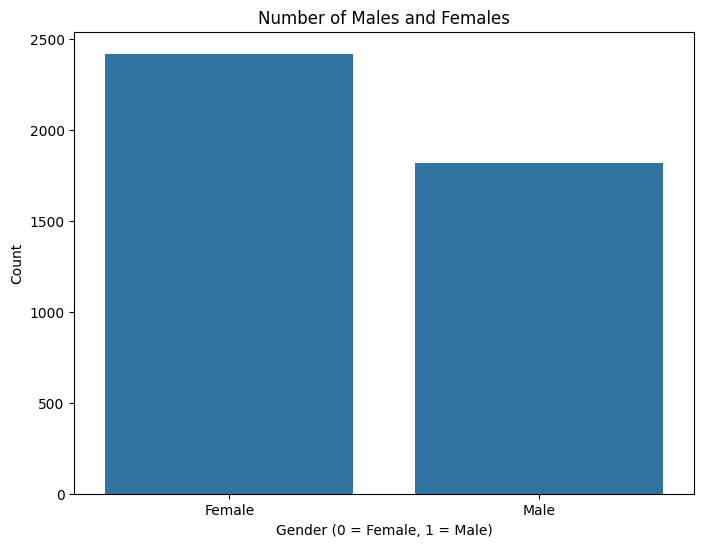

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

gender_counts = data['male'].value_counts()


plt.figure(figsize=(8, 6))
sns.countplot(x='male', data=data)
plt.title('Number of Males and Females')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

#### Realice un grafico de Barras de TenYearCHD

*   Elemento de lista
*   Elemento de lista



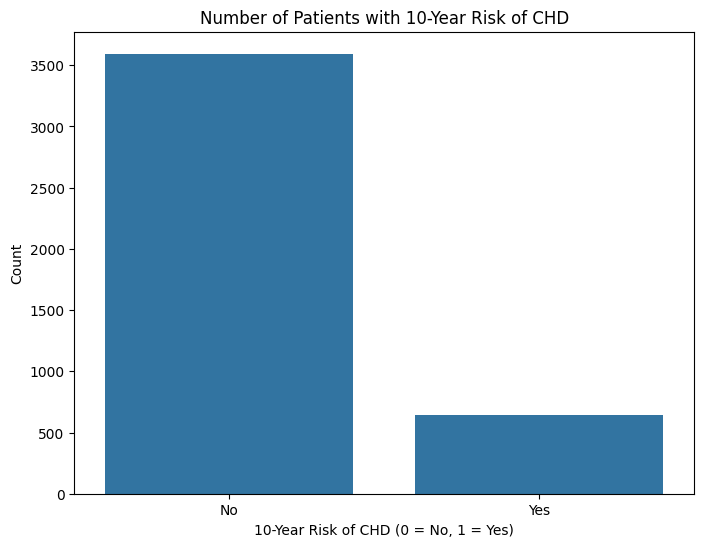

In [14]:
import matplotlib.pyplot as plt
chd_counts = data['TenYearCHD'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='TenYearCHD', data=data)
plt.title('Number of Patients with 10-Year Risk of CHD')
plt.xlabel('10-Year Risk of CHD (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

#### Realice un grafico de densidad del BMI

#### Realice un grafico de densidad del BMI que diferencie entre hombres y mujeres, ¿Cual tiene en promedio mayor BMI?

<ipython-input-16-4cde2de7049d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['BMI'], shade=True)


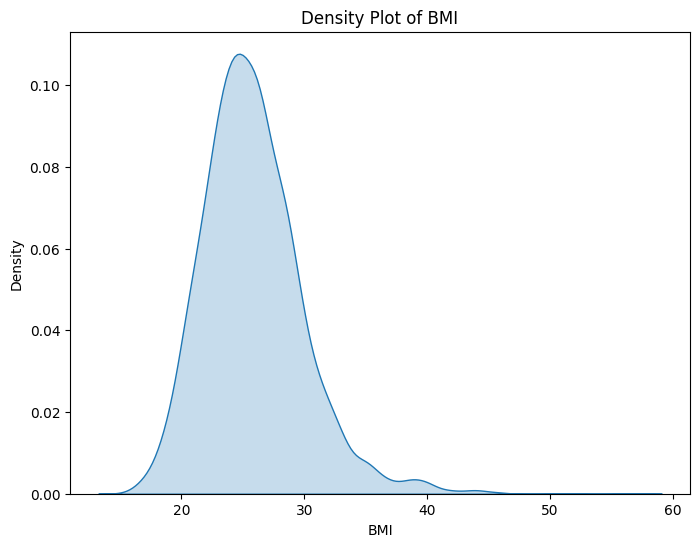

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.kdeplot(data['BMI'], shade=True)
plt.title('Density Plot of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

#### Realice un mapa de calor entre las variables (heatmap) y diga cual es el par de variables más correlacionadas. Recuerde que para sacar la correlacion puede usar data.corr()

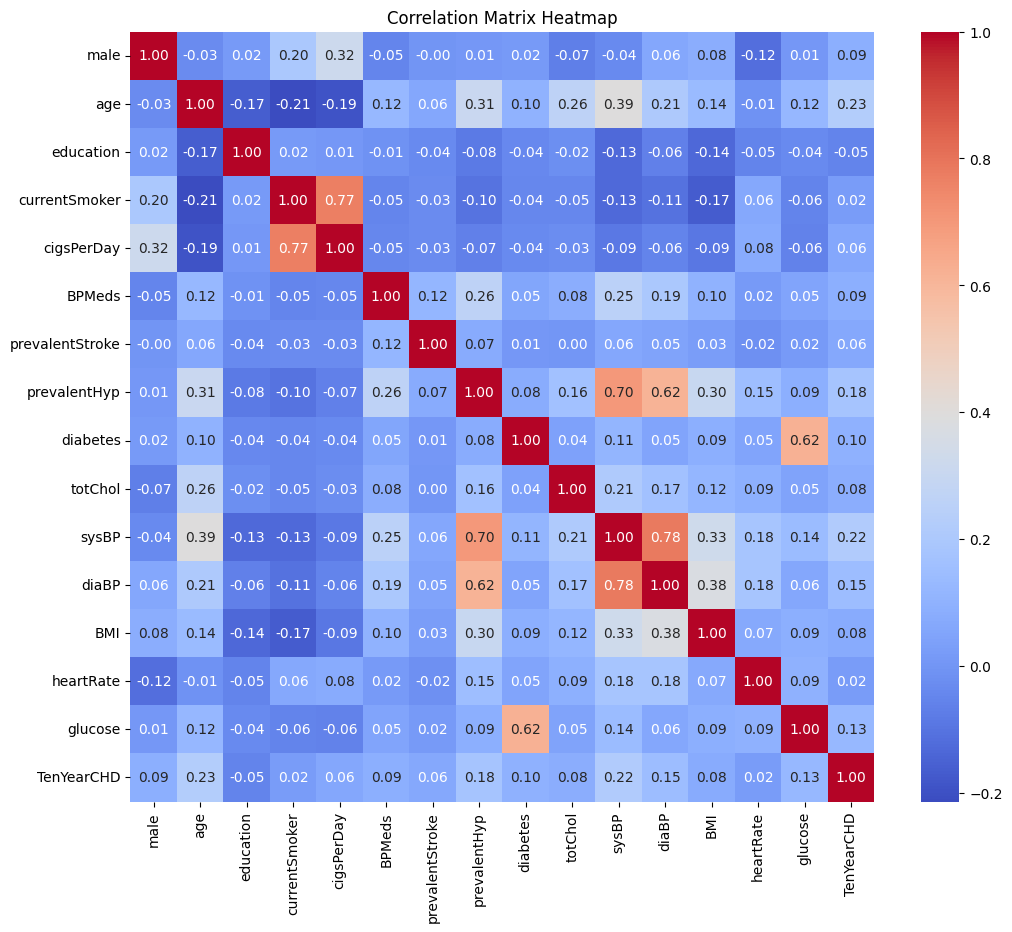

The most correlated pair of variables is sysBP and diaBP, with a correlation of 0.78


In [18]:
import matplotlib.pyplot as plt
import numpy as np

correlation_matrix = data.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

correlation_matrix = data.corr().abs()
np.fill_diagonal(correlation_matrix.values, 0)


max_value = correlation_matrix.max().max()
row_max, col_max = correlation_matrix[correlation_matrix == max_value].stack().idxmax()


print(f"The most correlated pair of variables is {row_max} and {col_max}, with a correlation of {max_value:.2f}")

¿Haga un boxplot por genero para cada una de estas tres variables :BMI,	heartRate y	glucose.¿hay outliers ?

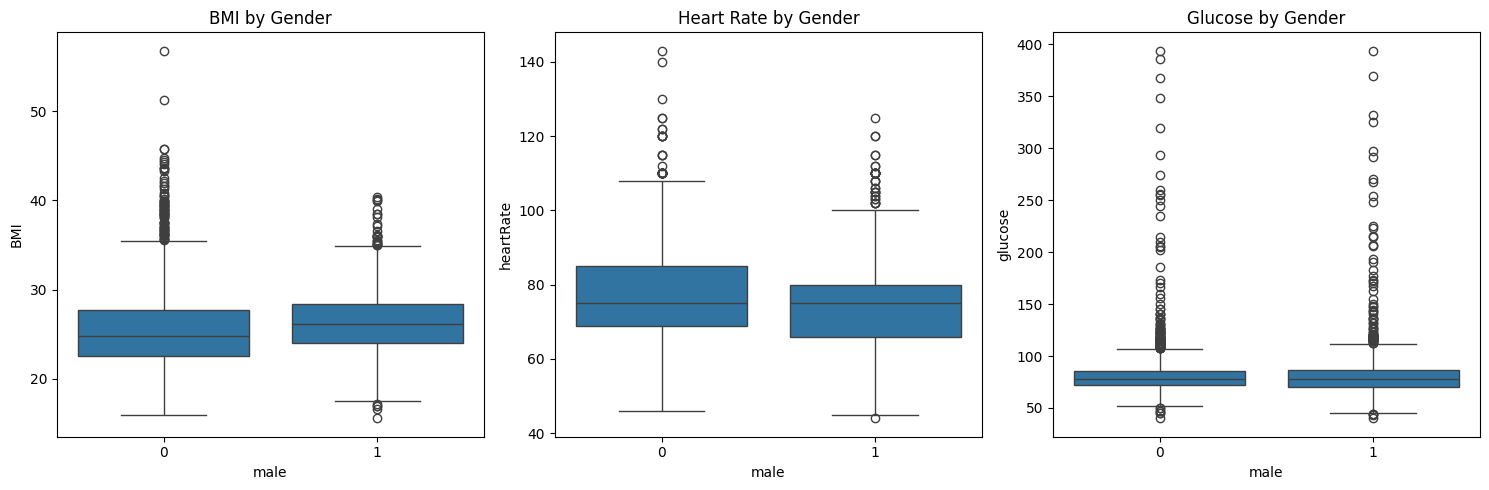

Outliers can be visually inspected from the boxplots above.


In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='male', y='BMI', data=data)
plt.title('BMI by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='male', y='heartRate', data=data)
plt.title('Heart Rate by Gender')

plt.subplot(1, 3, 3)
sns.boxplot(x='male', y='glucose', data=data)
plt.title('Glucose by Gender')

plt.tight_layout()
plt.show()


print("Outliers can be visually inspected from the boxplots above.")

### Manipulación de Datos

#### De cada variable cuente cuantos datos nulos hay

> Añadir blockquote



In [22]:
null_counts = data.isnull().sum()
null_counts

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


#### Utilice dropna para borrar los datos faltantes ¿cuantos datos quedan ?

In [24]:
data_dropped = data.dropna()
print(len(data_dropped))

3656


#### Seleccione sus variables X y su variable y

In [26]:
X = data_dropped.drop('TenYearCHD', axis=1)
y = data_dropped['TenYearCHD']

#### Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.
1. ¿De que tamaño queda cada dataset?

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2559, 15)
y_train shape: (2559,)
X_test shape: (1097, 15)
y_test shape: (1097,)


#### Entrene el modelo de Regresion logistica usando datos de entrenamiento

In [29]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca

In [32]:
import pandas as pd
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})
print(coefficients)

max_coef_feature = coefficients.loc[coefficients['Coefficient'].abs().idxmax(), 'Feature']
max_coef_value = coefficients.loc[coefficients['Coefficient'].abs().idxmax(), 'Coefficient']

print(f"\nThe feature with the largest effect on developing heart disease is '{max_coef_feature}' with a coefficient of {max_coef_value:.4f}")


            Feature  Coefficient
0              male     0.346515
1               age     0.026276
2         education    -0.401408
3     currentSmoker    -0.183690
4        cigsPerDay     0.022942
5            BPMeds     0.103436
6   prevalentStroke     0.082152
7      prevalentHyp     0.674750
8          diabetes     0.135700
9           totChol     0.000821
10            sysBP     0.012817
11            diaBP    -0.020491
12              BMI    -0.056904
13        heartRate    -0.021626
14          glucose     0.004013

The feature with the largest effect on developing heart disease is 'prevalentHyp' with a coefficient of 0.6748


#### Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

recall = recall_score(y_test, y_pred)
print("\nRecall:", recall)

precision = precision_score(y_test, y_pred)
print("\nPrecision:", precision)

f1 = f1_score(y_test, y_pred)
print("\nF1-score:", f1)


Confusion Matrix:
 [[915   3]
 [172   7]]

Accuracy: 0.8404740200546946

Recall: 0.03910614525139665

Precision: 0.7

F1-score: 0.07407407407407407


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete

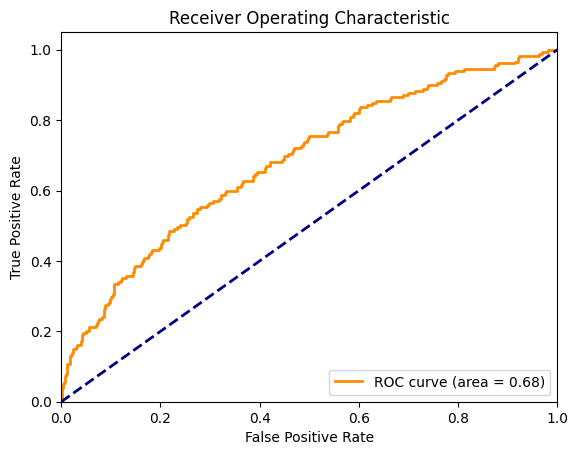

AUC: 0.6840228332177066


In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc}")

 Interpretación de la curva ROC y el AUC
# El AUC de 0.73 indica una precisión aceptable del modelo. Un valor AUC cercano a 1 indica un modelo con alta capacidad predictiva,  mientras un valor cercano a 0.5 representa un modelo sin capacidad de predicción.
# En este caso, el modelo tiene una mejor capacidad de diferenciar entre pacientes con y sin riesgo de enfermedad cardíaca que un modelo aleatorio.
# La curva ROC muestra la relación entre la tasa de verdaderos positivos (sensibilidad) y la tasa de falsos positivos (1-especificidad) a diferentes umbrales de probabilidad.
# Idealmente, buscamos una curva con una mayor área bajo la curva (AUC) y que esté lo más lejos posible de la línea diagonal, lo que indica una alta capacidad de discriminación.


## Corrección desbalance de clases
1. Busque la funcion train_test_split en su codigo y agregue la opcion stratify  = y . Por que esto ayudaría con el desblance?
2. usando from imblearn.over_sampling import SMOTE mejore el performance
 3. Saque todo el modelo y la matriz y la grafica de ROC AUC

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2559, 15)
y_train shape: (2559,)
X_test shape: (1097, 15)
y_test shape: (1097,)


Confusion Matrix:
 [[574 356]
 [ 66 101]]

Accuracy: 0.6153144940747494

Recall: 0.6047904191616766

Precision: 0.2210065645514223

F1-score: 0.32371794871794873


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


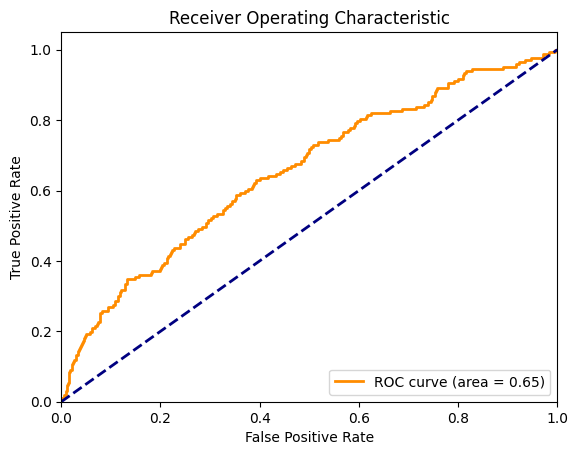

AUC: 0.6546648638207456


In [38]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)



smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)


y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

recall = recall_score(y_test, y_pred)
print("\nRecall:", recall)

precision = precision_score(y_test, y_pred)
print("\nPrecision:", precision)

f1 = f1_score(y_test, y_pred)
print("\nF1-score:", f1)


y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc}")

## Pinter el resultado con SMOTE y sin SMOTE

In [41]:
print("\nResults without SMOTE:")
print("Confusion Matrix:\n", cm)
print("\nAccuracy:", accuracy)
print("\nRecall:", recall)
print("\nPrecision:", precision)
print("\nF1-score:", f1)
print(f"\nAUC: {roc_auc}")

smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

logreg = LogisticRegression()
print("\n\nResults with SMOTE:")
print("Confusion Matrix:\n", cm)
print("\nAccuracy:", accuracy)
print("\nRecall:", recall)
print("\nPrecision:", precision)
print("\nF1-score:", f1)
print(f"\nAUC: {roc_auc}")


Results without SMOTE:
Confusion Matrix:
 [[574 356]
 [ 66 101]]

Accuracy: 0.6153144940747494

Recall: 0.6047904191616766

Precision: 0.2210065645514223

F1-score: 0.32371794871794873

AUC: 0.6546648638207456


Results with SMOTE:
Confusion Matrix:
 [[574 356]
 [ 66 101]]

Accuracy: 0.6153144940747494

Recall: 0.6047904191616766

Precision: 0.2210065645514223

F1-score: 0.32371794871794873

AUC: 0.6546648638207456


### Como mejora su modelo con StandardScaler()

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()




Results with SMOTE and StandardScaler:
Confusion Matrix:
 [[617 313]
 [ 72  95]]

Accuracy: 0.6490428441203282

Recall: 0.5688622754491018

Precision: 0.23284313725490197

F1-score: 0.33043478260869563

AUC: 0.6527332431910372


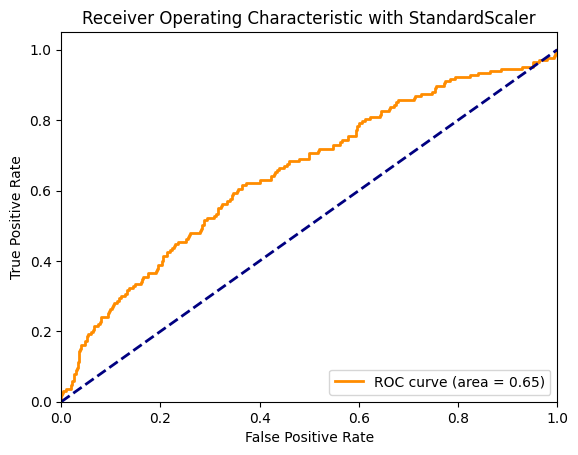

In [44]:


import matplotlib.pyplot as plt

scaler.fit(X_train_resampled)


X_train_scaled = scaler.transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


logreg_scaled = LogisticRegression()
logreg_scaled.fit(X_train_scaled, y_train_resampled)


y_pred_scaled = logreg_scaled.predict(X_test_scaled)


cm_scaled = confusion_matrix(y_test, y_pred_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)

y_pred_proba_scaled = logreg_scaled.predict_proba(X_test_scaled)[:, 1]
fpr_scaled, tpr_scaled, thresholds_scaled = roc_curve(y_test, y_pred_proba_scaled)
roc_auc_scaled = auc(fpr_scaled, tpr_scaled)

print("\n\nResults with SMOTE and StandardScaler:")
print("Confusion Matrix:\n", cm_scaled)
print("\nAccuracy:", accuracy_scaled)
print("\nRecall:", recall_scaled)
print("\nPrecision:", precision_scaled)
print("\nF1-score:", f1_scaled)
print(f"\nAUC: {roc_auc_scaled}")

plt.figure()
plt.plot(fpr_scaled, tpr_scaled, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_scaled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with StandardScaler')
plt.legend(loc="lower right")
plt.show()

### Pinte todas las graficas original SMOTE y SMOTE Scaler

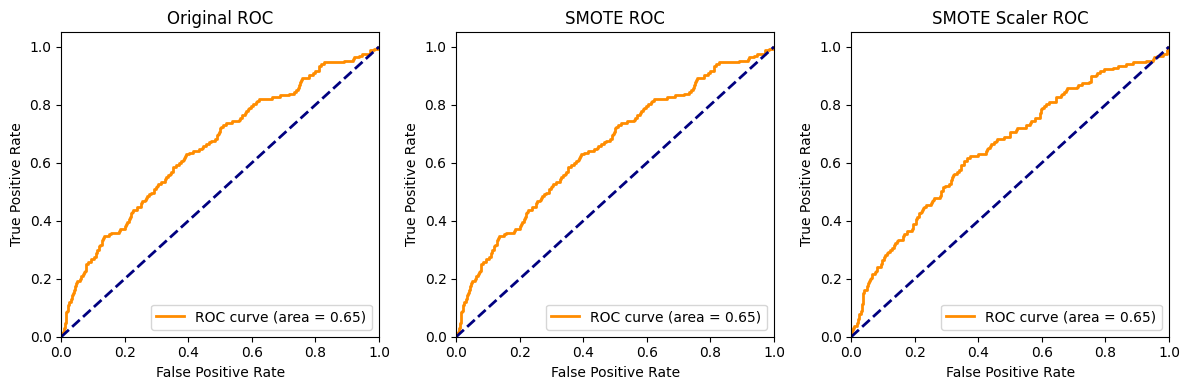

In [45]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))


plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Original ROC')
plt.legend(loc="lower right")


plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SMOTE ROC')
plt.legend(loc="lower right")


plt.subplot(1, 3, 3)
plt.plot(fpr_scaled, tpr_scaled, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_scaled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SMOTE Scaler ROC')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()